In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns


In [2]:
df=pd.read_csv("Customer_dataset_2.csv")
df.head()

,Gender,Age,Spending Score (1-100K),PLACE
0,Male,19,39,ONGOLE
1,Male,80,81,GUNTUR
2,Female,77,6,VIJAYAWADA
3,Female,55,77,TENALI
4,Female,31,40,ONGOLE


In [3]:
df.rename(columns={'Genere':'Gender'},inplace=True)


In [4]:
df.head()


,Gender,Age,Spending Score (1-100K),PLACE
0,Male,19,39,ONGOLE
1,Male,80,81,GUNTUR
2,Female,77,6,VIJAYAWADA
3,Female,55,77,TENALI
4,Female,31,40,ONGOLE


In [5]:
df.shape

(200, 4)

In [6]:
df.describe()

,Age,Spending Score (1-100K)
count,200.000000,200.000000
mean,39.590000,50.200000
std,14.389831,25.823522
min,18.000000,1.000000
25%,29.000000,34.750000
50%,36.000000,50.000000
75%,49.000000,73.000000
max,80.000000,99.000000


In [7]:
df.dtypes

Gender                     object
Age                         int64
Spending Score (1-100K)     int64
PLACE                      object
dtype: object

In [8]:
df.isnull().sum()

Gender                     0
Age                        0
Spending Score (1-100K)    0
PLACE                      0
dtype: int64

In [9]:
df.head()

,Gender,Age,Spending Score (1-100K),PLACE
0,Male,19,39,ONGOLE
1,Male,80,81,GUNTUR
2,Female,77,6,VIJAYAWADA
3,Female,55,77,TENALI
4,Female,31,40,ONGOLE


C:\ProgramData\Anaconda3\lib\site-packages\seaborn\distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
C:\ProgramData\Anaconda3\lib\site-packages\seaborn\distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


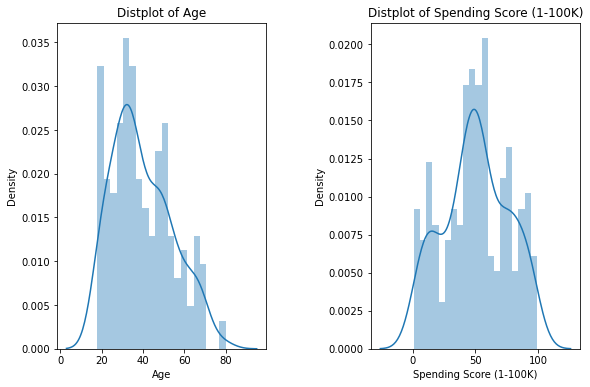

In [10]:
plt.figure(1,figsize=(15,6))
n=0
for x in ['Age','Spending Score (1-100K)']:
    n+=1
    plt.subplot(1,3,n)
    plt.subplots_adjust(hspace=0.5,wspace=0.5)
    sns.distplot(df[x],bins=20)
    plt.title('Distplot of {}'.format(x))
plt.show()

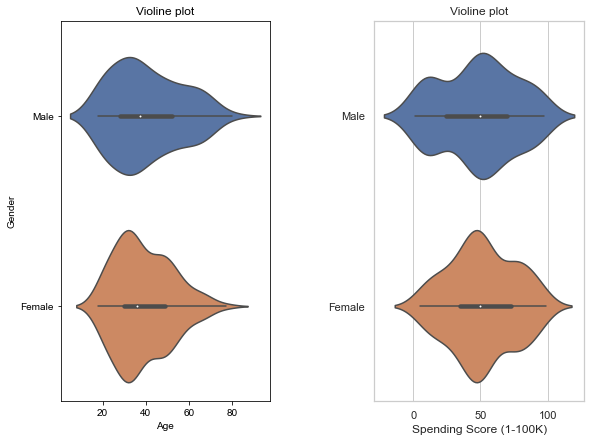

In [19]:
plt.figure(1,figsize=(15,7))
n=0
for cols in ['Age','Spending Score (1-100K)']:
    n+=1
    plt.subplot(1,3,n)
    sns.set(style="whitegrid")
    plt.subplots_adjust(hspace=0.5,wspace=0.5)
    sns.violinplot(x= cols,y='Gender',data=df)
    plt.ylabel('Gender' if n== 1 else "")
    plt.title('Violine plot')
plt.show()

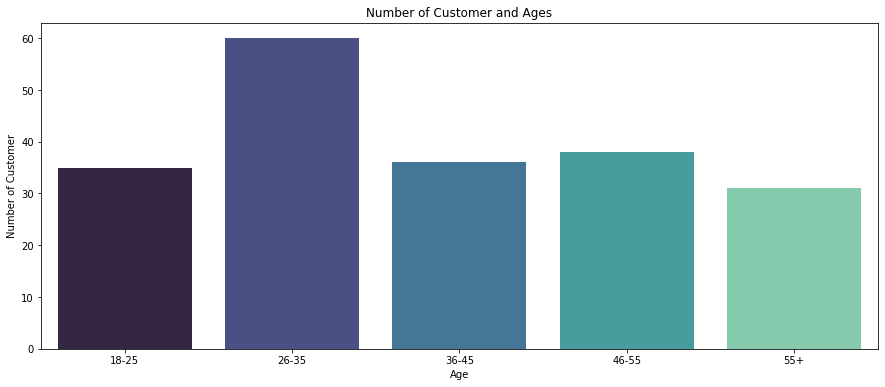

In [12]:

age_18_25 = df.Age[(df.Age>=18)&(df.Age<=25)]
age_26_35 = df.Age[(df.Age>=26)&(df.Age<=35)]
age_36_45 = df.Age[(df.Age>=36)&(df.Age<=45)]
age_46_55 = df.Age[(df.Age>=46)&(df.Age<=55)]
age_55above = df.Age[df.Age>=56]

agex=["18-25","26-35","36-45","46-55","55+"]
agey=[len(age_18_25.values),len(age_26_35.values),len(age_36_45.values),len(age_46_55.values),len(age_55above.values)]

plt.figure(figsize=(15,6))
sns.barplot(x=agex,y=agey,palette="mako")
plt.title("Number of Customer and Ages")
plt.xlabel("Age")
plt.ylabel("Number of Customer")
plt.show()


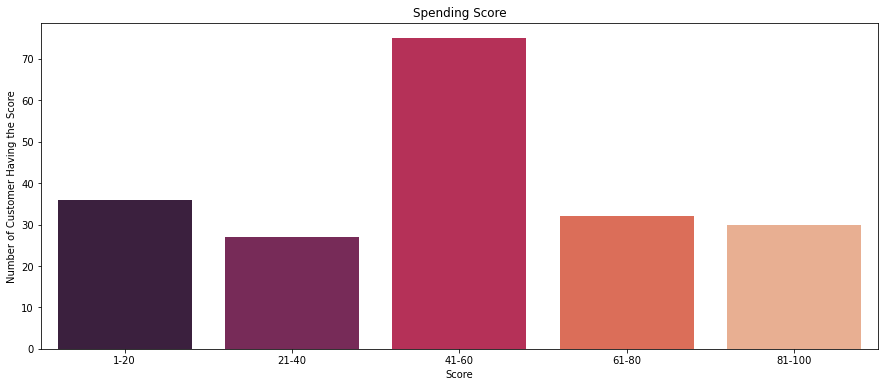

In [13]:
ss_1_20=df["Spending Score (1-100K)"][(df["Spending Score (1-100K)"]>=1)&(df["Spending Score (1-100K)"]<=20)]
ss_21_40=df["Spending Score (1-100K)"][(df["Spending Score (1-100K)"]>=21)&(df["Spending Score (1-100K)"]<=40)]
ss_41_60=df["Spending Score (1-100K)"][(df["Spending Score (1-100K)"]>=41)&(df["Spending Score (1-100K)"]<=60)]
ss_61_80=df["Spending Score (1-100K)"][(df["Spending Score (1-100K)"]>=61)&(df["Spending Score (1-100K)"]<=80)]
ss_81_100=df["Spending Score (1-100K)"][(df["Spending Score (1-100K)"]>=81)&(df["Spending Score (1-100K)"]<=100)]

ssx=["1-20","21-40","41-60","61-80","81-100"]
ssy=[len(ss_1_20.values),len(ss_21_40.values),len(ss_41_60.values),len(ss_61_80.values),len(ss_81_100.values)]

plt.figure(figsize=(15,6))
sns.barplot(x=ssx,y=ssy,palette="rocket")
plt.title("Spending Score")
plt.xlabel("Score")
plt.ylabel("Number of Customer Having the Score")
plt.show()

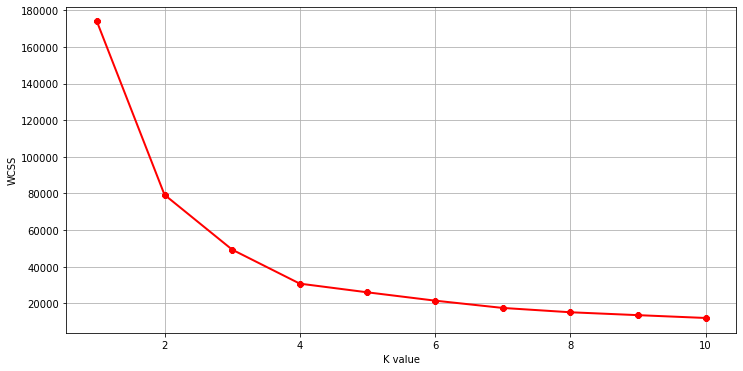

In [17]:
X1=df.loc[:,["Age","Spending Score (1-100K)"]].values

from sklearn.cluster import KMeans
wcss=[]
for k in range(1,11):
    kmeans=KMeans(k,init="k-means++")
    kmeans.fit(X1)
    wcss.append(kmeans.inertia_)
plt.figure(figsize=(12,6))
plt.grid()
plt.plot(range(1,11),wcss,linewidth=2,color="red",marker="8")
plt.xlabel("K value")
plt.ylabel("WCSS")
plt.show()

In [18]:
kmeans=KMeans(n_clusters=4)
label=kmeans.fit_predict(X1)
print(label)


[3 0 1 2 3 2 1 2 1 2 1 2 1 2 1 2 3 3 1 2 3 2 1 2 1 2 1 3 1 2 1 2 1 2 1 2 1
 2 1 2 0 2 0 3 1 3 0 3 3 3 0 3 3 0 0 0 0 0 3 0 0 3 0 0 0 3 0 0 3 3 0 0 0 0
 0 3 0 3 3 0 0 3 0 0 3 0 0 3 3 0 0 3 0 3 3 3 0 3 0 3 3 0 0 3 0 3 0 0 0 0 0
 3 3 3 3 3 0 0 0 0 3 3 3 2 3 2 0 2 1 2 1 2 3 2 1 2 1 2 1 2 1 2 3 2 1 2 0 2
 1 2 1 2 1 2 1 2 1 2 1 2 0 2 1 2 1 2 1 2 1 3 1 2 1 2 1 2 1 2 1 2 1 2 1 2 3
 2 1 2 1 2 1 2 1 2 1 2 1 2 1 2]


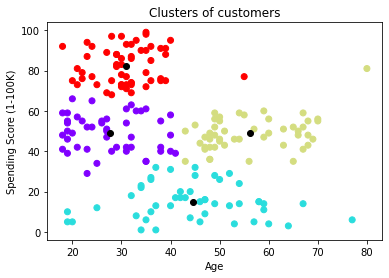

In [16]:
plt.scatter(X1[:,0],X1[:,1],c=kmeans.labels_,cmap="rainbow")
plt.scatter(kmeans.cluster_centers_[:,0],kmeans.cluster_centers_[:,1],color='black')
plt.title('Clusters of customers')
plt.xlabel('Age')
plt.ylabel('Spending Score (1-100K)')
plt.show()